<a href="https://colab.research.google.com/github/jcdgingo/1-SVTS/blob/master/P1_Statistical_validation_of_trading_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

## Objective

This notebook aims to model the price movement of EURUSD currency pair based on the variables that might affect the movements. This project will provide a means of measurement in terms of the relevance of the variable in predicting currency movement in 5 minute timeframe


## Statement

The problem that is being solved in this project started in the question as what is the relevance in terms of quantifiable relevance of general sentiment, sentiment change, currency indices, 20-period moving average of volume, the change in difference between 5-period and 10-period moving average of volume, the divergence and convergence of the currency indices, and the anomaly where diverging strong USD and weak EUR with bullish candle or vice versa.

Quantifiable relevance as defined in this project is the ranking of the variables based on their calculated relevance using machine learning techniques, which is related to feature engineering in any data science project.

Finally the relevance is being ranked and assign weights in predicting the currency movement in 5 minute timeframe.

Financial market in general involves complex microsturcture with numerous agents that account to its complexity. This project revolves around the idea of adaptive markets hyptothesis (Andrew Lo), which is the cross discpilinary of mainstream economic theory and behavioural psychology such as biases and heuristics in spotting those inefficiencies

# Data Understanding and Preparation

## Exploratory Data Analysis

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

#df = pd.read_csv('FX_EURUSD, 15_566b2.csv')



In [ ]:
df1=df
#df1 = df.drop(['Time', 'Date'], axis=1)

#Removing other variables come out as best predictor
df1=df.drop(['Signal',
             'Time',
             'Date',
             'Currency div candle',
             'EUR Index (Average)',
             'USD Index (HLC)',
             'Basis',
             'Upper',
             'Lower',
             'Plot',
             'Accumulation/Distribution',
             'Histogram',
             'SMI',
             'SMI-based EMA',
             'D',
             'Session',
             'Day',
             'MACD',
             'Signal1'], axis=1)

#Separate target variable and predictors
X = df1.drop('Candlestick', axis=1) # predictors
y = df1['Candlestick'] # target

In [ ]:
X

,open,high,low,close,RVI,RVI-based MA,K
0,1.10072,1.10087,1.10043,1.10060,36.080447,48.232021,54.797711
1,1.10060,1.10065,1.10010,1.10025,30.176653,47.405358,42.494708
2,1.10025,1.10025,1.09949,1.09967,24.773354,45.679963,19.120912
3,1.09967,1.10016,1.09947,1.10016,36.994412,44.358227,16.901916
4,1.10016,1.10056,1.09964,1.09978,31.823584,42.143145,21.186421
...,...,...,...,...,...,...,...
10998,1.05943,1.05962,1.05923,1.05933,52.974105,60.260352,27.791293
10999,1.05933,1.05958,1.05890,1.05896,49.376897,59.590519,24.763636
11000,1.05896,1.05897,1.05846,1.05847,46.279233,58.333243,11.065380
11001,1.05847,1.05856,1.05827,1.05845,42.760046,57.304844,0.000000


In [ ]:
df1=df
#df1 = df.drop(['Time', 'Date'], axis=1)

#Removing other variables come out as best predictor
df1=df.drop(['Signal',
             'Time',
             'Date',
             'Currency div candle',
             'EUR Index (Average)',
             'USD Index (HLC)',
             'Basis',
             'Upper',
             'Lower',
             'Plot',
             'Accumulation/Distribution',
             'Histogram',
             'SMI',
             'SMI-based EMA',
             'D',
             'Session',
             'Day',
             'MACD',
             'Signal1'], axis=1)

#Separate target variable and predictors
X = df1.drop('Candlestick', axis=1) # predictors
y = df1['Candlestick'] # target


# Convert to binary format



#y = y.map({'No trade':0,'Buy':1, 'Sell':2})
#y = y.map({'No trade':0,'Buy':1, 'Sell':2})
y = y.map({'Bearish':0,
           'Bullish':1,
           'Bullish Marubozu':2,
           'Bearish Marubozu':3,
           'Neutral':4,
           'Bearish Doji':5,
           'Bullish Doji':6})

#assure that data has no NaN values
df1=df1.dropna()

# Train/test split
split_idx = int(len(X) * 0.8)
X_train, y_train, X_test, y_test = (X[:split_idx],
                                    y[:split_idx],
                                    X[split_idx:],
                                    y[split_idx:])



from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled




# Assuming the y values are class labels like 0, 1, 2
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train,
                         num_classes=7)
y_test = to_categorical(y_test,
                        num_classes=7)





# Reshape X for LSTM [samples, time steps, features]
features = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], 1, features)
X_test = X_test.reshape(X_test.shape[0], 1, features)



# LSTM model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(1, features)))
model.add(Dense(7, activation='softmax'))  # Change the number of neurons to 3 and activation to softmax for 3 classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy for multi-class classification

# Train the model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Predict using the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

69/69 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred are defined from the previous code
mae = mean_absolute_error(y_test, y_pred_probs)
mse = mean_squared_error(y_test, y_pred_probs)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.1219
Mean Squared Error (MSE): 0.0603
Root Mean Squared Error (RMSE): 0.2456


In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report

# Convert one-hot encoded y_test back to class labels if needed
y_test_labels = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# Assuming y_pred contains predicted class labels
# Make sure y_pred is also in the same format (1D array of class labels)

# Compute the classification report
classification_rep = classification_report(y_test_labels, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79       730
           1       0.71      0.94      0.81       725
           2       0.75      0.31      0.44       261
           3       0.63      0.40      0.49       262
           4       0.00      0.00      0.00        45
           5       0.30      0.07      0.11        99
           6       0.38      0.06      0.11        79

    accuracy                           0.70      2201
   macro avg       0.50      0.38      0.39      2201
weighted avg       0.66      0.70      0.65      2201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Save the model to Google Drive
model.save("/content/gdrive/My Drive/1 Project/my_model.keras")

drive.mount("/content/gdrive", force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


NameError: ignored

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd

In [ ]:
test_path = pd.read_csv("/content/gdrive/My Drive/1 Projects/Colab Notebooks/EURUSD1Mtimebased.csv")

In [ ]:
test_path

,time,Day,Time,Session,open,high,low,close,RVI,RVI-based MA,K,Candlestick
0,2023-09-24T17:43:00-04:00,2023-09-24,17:43,Sydney Session,1.06500,1.06500,1.06500,1.06500,16.238523,15.722578,77.765588,Neutral
1,2023-09-24T17:44:00-04:00,2023-09-24,17:44,Sydney Session,1.06500,1.06500,1.06494,1.06494,14.089548,15.208749,95.734787,Bearish Marubozu
2,2023-09-24T17:45:00-04:00,2023-09-24,17:45,Sydney Session,1.06494,1.06494,1.06406,1.06417,9.938866,15.199304,66.081193,Bearish Marubozu
3,2023-09-24T17:46:00-04:00,2023-09-24,17:46,Sydney Session,1.06417,1.06420,1.06417,1.06420,36.925651,17.444700,34.606022,Bullish Marubozu
4,2023-09-24T17:47:00-04:00,2023-09-24,17:47,Sydney Session,1.06420,1.06424,1.06420,1.06424,54.240851,18.630019,9.926873,Bullish Marubozu
...,...,...,...,...,...,...,...,...,...,...,...,...
15889,2023-10-09T19:25:00-04:00,2023-10-09,19:25,Sydney-Tokyo Overlap,1.05738,1.05740,1.05738,1.05739,50.177317,59.235323,59.715814,Bullish
15890,2023-10-09T19:26:00-04:00,2023-10-09,19:26,Sydney-Tokyo Overlap,1.05739,1.05741,1.05737,1.05740,56.217019,58.953828,61.207650,Bullish
15891,2023-10-09T19:27:00-04:00,2023-10-09,19:27,Sydney-Tokyo Overlap,1.05740,1.05740,1.05738,1.05739,53.239352,57.970946,60.268203,Bearish
15892,2023-10-09T19:28:00-04:00,2023-10-09,19:28,Sydney-Tokyo Overlap,1.05739,1.05742,1.05736,1.05741,55.583210,56.767241,60.664181,Bullish


In [ ]:
test_path = test_path.drop(['time', 'Day', 'Time'], axis=1)
test_path = test_path.dropna()

In [ ]:
test_path = test_path[test_path['Session']=='Sydney-Tokyo Overlap']
test_path = test_path.drop(['Session'], axis=1)

In [ ]:
test_path

,open,high,low,close,RVI,RVI-based MA,K,Candlestick
76,1.06490,1.06490,1.06487,1.06487,37.367999,36.781760,62.578651,Bearish Marubozu
77,1.06487,1.06487,1.06472,1.06472,30.231974,36.238339,38.162796,Bearish Marubozu
78,1.06472,1.06477,1.06469,1.06476,44.214893,36.869165,22.970114,Bullish
79,1.06476,1.06478,1.06473,1.06475,35.195086,36.462847,17.295031,Bearish
80,1.06475,1.06494,1.06473,1.06486,47.612229,37.192076,47.983269,Bullish
...,...,...,...,...,...,...,...,...
15889,1.05738,1.05740,1.05738,1.05739,50.177317,59.235323,59.715814,Bullish
15890,1.05739,1.05741,1.05737,1.05740,56.217019,58.953828,61.207650,Bullish
15891,1.05740,1.05740,1.05738,1.05739,53.239352,57.970946,60.268203,Bearish
15892,1.05739,1.05742,1.05736,1.05741,55.583210,56.767241,60.664181,Bullish


In [ ]:
from google.colab import drive
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.preprocessing import MinMaxScaler




X = test_path.drop('Candlestick', axis=1) # predictors
y = test_path['Candlestick'] # target


# Convert to binary format



#y = y.map({'No trade':0,'Buy':1, 'Sell':2})
#y = y.map({'No trade':0,'Buy':1, 'Sell':2})
y = y.map({'Bearish':0,
           'Bullish':1,
           'Bullish Marubozu':2,
           'Bearish Marubozu':3,
           'Neutral':3,
           'Bearish Doji':5,
           'Bullish Doji':6})
from keras.utils import to_categorical
y_reshaped = to_categorical(y, num_classes=7)



# Load the saved model
model_path = "/content/gdrive/My Drive//1 Projects/Colab Notebooks/my_model.keras"

loaded_model = load_model(model_path)

#open_value = 1.05417
#high_value = 1.05469
#low_value = 1.05374
#close_value = 1.05464
#rvi_value = 60.89
#rvi_ma_value = 43.47
#k_value = 100

# Define the features for the single entry
#single_entry_features = np.array([[open_value, high_value, low_value, close_value, rvi_value, rvi_ma_value, k_value]])
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

features = X.shape[1]
X = X.reshape(X.shape[0], 1, features)


# Now you can use the loaded model for inference
predictions_probs = loaded_model.predict(X)
predictions = np.argmax(predictions_probs, axis=1)

print(predictions)


497/497 [==============================] - 1s 2ms/step
[1 0 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred are defined from the previous code
mae = mean_absolute_error(y_reshaped, predictions_probs)
mse = mean_squared_error(y_reshaped, predictions_probs)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y, predictions)
classification_rep = classification_report(y, predictions)
confusion_mat = confusion_matrix(y, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{confusion_mat}")


Mean Absolute Error (MAE): 0.1931
Mean Squared Error (MSE): 0.1074
Root Mean Squared Error (RMSE): 0.3278
Accuracy: 50.06%
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65      4625
           1       0.45      1.00      0.62      4491
           2       1.00      0.00      0.00      2514
           3       0.67      0.00      0.00      3686
           5       0.00      0.00      0.00       256
           6       0.00      0.00      0.00       322

    accuracy                           0.50     15894
   macro avg       0.45      0.29      0.21     15894
weighted avg       0.61      0.50      0.37     15894

Confusion Matrix:
[[3462 1162    0    1    0    0]
 [   0 4491    0    0    0    0]
 [   0 2512    2    0    0    0]
 [2475 1209    0    2    0    0]
 [  58  198    0    0    0    0]
 [   0  322    0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


347/347 [==============================] - 1s 3ms/step
[1 0 0 ... 1 1 0]


Mean Absolute Error (MAE): 0.2419
Mean Squared Error (MSE): 0.1549
Root Mean Squared Error (RMSE): 0.3936
Accuracy: 9.62%
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.08      0.03      1060
           1       0.14      0.20      0.16      5018
           2       0.00      0.00      0.00      5014
           3       0.00      0.00      0.00         0

    accuracy                           0.10     11092
   macro avg       0.04      0.07      0.05     11092
weighted avg       0.07      0.10      0.08     11092

Confusion Matrix:
[[  82  978    0    0]
 [4030  985    0    3]
 [   0 5014    0    0]
 [   0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Accuracy: 71.09%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       663
           1       0.72      0.90      0.80       631
           2       0.65      0.51      0.57       227
           3       0.67      0.47      0.55       255
           4       0.00      0.00      0.00        23
           5       0.60      0.04      0.07        82
           6       0.60      0.10      0.17        94

    accuracy                           0.71      1975
   macro avg       0.57      0.41      0.42      1975
weighted avg       0.69      0.71      0.67      1975

Confusion Matrix:
[[593   8   0  59   0   0   3]
 [  3 565  61   0   0   1   1]
 [  0 112 115   0   0   0   0]
 [136   0   0 119   0   0   0]
 [ 17   4   0   0   0   1   1]
 [ 61  17   0   0   0   3   1]
 [  8  77   0   0   0   0   9]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred are defined from the previous code
mae = mean_absolute_error(y_test, y_pred_probs)
mse = mean_squared_error(y_test, y_pred_probs)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

In [ ]:
df1=df
#df1 = df.drop(['Time', 'Date'], axis=1)

#Removing other variables come out as best predictor
df1=df.drop(['Signal',
             'Time',
             'Date',
             'Currency div candle',
             'EUR Index (Average)',
             'USD Index (HLC)',
             'Basis',
             'Upper',
             'Lower',
             'Plot',
             'Accumulation/Distribution',
             'Histogram',
             'SMI',
             'SMI-based EMA',
             'D',
             'Session',
             'Day',
             'MACD',
             'Signal1'], axis=1)

#Separate target variable and predictors
X = df1.drop('Candlestick', axis=1) # predictors
y = df1['Candlestick'] # target


# Convert to binary format
X['Session'] = X['Session'].map({'Sydney-Tokyo Overlap':1,
                                 'Tokyo Session':2,
                                 'Tokyo-London Overlap':3,
                                 'London Session':4,
                                 'London-New York Overlap':5,
                                 'New York Session':6,
                                 'Sydney Session':7})
X['Day'] = X['Day'].map({'Monday':1,
                         'Tuesday':2,
                         'Wednesday':3,
                         'Thursday':4,
                         'Friday':5,
                         'Sunday':6})


'''X['Currency div candle'] = X['Currency div candle'].map({'cond':1,
                                                         'divd':2,
                                                         'divu':3,
                                                         'conu':4})'''
'''X['Signal']=X['Signal'].map({'No trade':0,
                             'Buy':1,
                             'Sell':2})'''


#y = y.map({'No trade':0,'Buy':1, 'Sell':2})
#y = y.map({'No trade':0,'Buy':1, 'Sell':2})
y = y.map({'Bearish':0,
           'Bullish':1,
           'Bullish Marubozu':2,
           'Bearish Marubozu':3,
           'Neutral':4,
           'Bearish Doji':5,
           'Bullish Doji':6})

#assure that data has no NaN values
df1=df1.dropna()

# Train/test split
split_idx = int(len(X) * 0.8)
X_train, y_train, X_test, y_test = (X[:split_idx],
                                    y[:split_idx],
                                    X[split_idx:],
                                    y[split_idx:])



from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled




# Assuming the y values are class labels like 0, 1, 2
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train,
                         num_classes=7)
y_test = to_categorical(y_test,
                        num_classes=7)





# Reshape X for LSTM [samples, time steps, features]
features = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], 1, features)
X_test = X_test.reshape(X_test.shape[0], 1, features)



# LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, features)))
model.add(Dense(7, activation='softmax'))  # Change the number of neurons to 3 and activation to softmax for 3 classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy for multi-class classification

# Train the model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Predict using the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

69/69 [==============================] - 0s 2ms/step


In [ ]:
df1=df
#df1 = df.drop(['Time', 'Date'], axis=1)

#Removing other variables come out as best predictor
df1=df.drop(['Signal',
             'Time',
             'Date',
             'Currency div candle',
             'EUR Index (Average)',
             'USD Index (HLC)',
             'Basis',
             'Upper',
             'Lower',
             'Plot',
             'Accumulation/Distribution',
             'Histogram',
             'SMI',
             'SMI-based EMA',
             'D',
             'Session',
             'Day',
             'MACD',
             'Signal1'], axis=1)

#Separate target variable and predictors
X = df1.drop('Candlestick', axis=1) # predictors
y = df1['Candlestick'] # target


# Convert to binary format
X['Session'] = X['Session'].map({'Sydney-Tokyo Overlap':1,
                                 'Tokyo Session':2,
                                 'Tokyo-London Overlap':3,
                                 'London Session':4,
                                 'London-New York Overlap':5,
                                 'New York Session':6,
                                 'Sydney Session':7})
X['Day'] = X['Day'].map({'Monday':1,
                         'Tuesday':2,
                         'Wednesday':3,
                         'Thursday':4,
                         'Friday':5,
                         'Sunday':6})


'''X['Currency div candle'] = X['Currency div candle'].map({'cond':1,
                                                         'divd':2,
                                                         'divu':3,
                                                         'conu':4})'''
'''X['Signal']=X['Signal'].map({'No trade':0,
                             'Buy':1,
                             'Sell':2})'''


#y = y.map({'No trade':0,'Buy':1, 'Sell':2})
#y = y.map({'No trade':0,'Buy':1, 'Sell':2})
y = y.map({'Bearish':0,
           'Bullish':1,
           'Bullish Marubozu':2,
           'Bearish Marubozu':3,
           'Neutral':4,
           'Bearish Doji':5,
           'Bullish Doji':6})

#assure that data has no NaN values
df1=df1.dropna()

# Train/test split
split_idx = int(len(X) * 0.8)
X_train, y_train, X_test, y_test = (X[:split_idx],
                                    y[:split_idx],
                                    X[split_idx:],
                                    y[split_idx:])



from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled




# Assuming the y values are class labels like 0, 1, 2
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train,
                         num_classes=7)
y_test = to_categorical(y_test,
                        num_classes=7)





# Reshape X for LSTM [samples, time steps, features]
features = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], 1, features)
X_test = X_test.reshape(X_test.shape[0], 1, features)



# LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, features)))
model.add(Dense(7, activation='softmax'))  # Change the number of neurons to 3 and activation to softmax for 3 classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy for multi-class classification

# Train the model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Predict using the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

69/69 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred are defined from the previous code
mae = mean_absolute_error(y_test, y_pred_probs)
mse = mean_squared_error(y_test, y_pred_probs)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.1741
Mean Squared Error (MSE): 0.1032
Root Mean Squared Error (RMSE): 0.3213


In [ ]:
df1=df
#df1 = df.drop(['Time', 'Date'], axis=1)

#Removing other variables come out as best predictor
"""df1=df.drop(['Signal',
             'Time',
             'Date',
             'Currency div candle',
             'EUR Index (Average)',
             'USD Index (HLC)',
             'Basis',
             'Upper',
             'Lower',
             'Plot',
             'Accumulation/Distribution',
             'Histogram',
             'SMI',
             'SMI-based EMA',
             'D',
             'Session',
             'Day',
             'MACD',
             'Signal1'], axis=1)"""

#Separate target variable and predictors
X = df1.drop('Candlestick', axis=1) # predictors
y = df1['Candlestick'] # target


# Convert to binary format
X['Session'] = X['Session'].map({'Sydney-Tokyo Overlap':1,
                                 'Tokyo Session':2,
                                 'Tokyo-London Overlap':3,
                                 'London Session':4,
                                 'London-New York Overlap':5,
                                 'New York Session':6,
                                 'Sydney Session':7})
X['Day'] = X['Day'].map({'Monday':1,
                         'Tuesday':2,
                         'Wednesday':3,
                         'Thursday':4,
                         'Friday':5,
                         'Sunday':6})
'''X['Volume oscillator change'] = X['Volume oscillator change'].map({'Increasing': 2,
                                                                   'Decreasing': 1})'''
#X['EXY change'] = X['EXY change'].map({'Increasing': 2,
#                                       'Decreasing': 1})
#X['DXY change'] = X['DXY change'].map({'Increasing': 2,
                                       'Decreasing': 1})
'''X['Sentiment'] = X['Sentiment'].map({'buy': 2,
                                     'sell': 1})'''
'''X['Sentiment delta'] = X['Sentiment delta'].map({'buy': 2,
                                                 'sell': 1,
                                                 "neutral": 3})'''
X['Currency div candle'] = X['Currency div candle'].map({'cond':1,
                                                         'divd':2,
                                                         'divu':3,
                                                         'conu':4})
X['Signal']=X['Signal'].map({'No trade':0,
                             'Buy':1,
                             'Sell':2})
X['Candlestick'] = X['Candlestick'].map({'Bearish':1,
                                         'Bullish':2,
                                         'Bullish Marubozu':3,
                                         'Bearish Marubozu':4,
                                         'Neutral':5,
                                         'Bearish Doji':6,
                                         'Bullish Doji':7})
X['Confluence currency div candle'] = X['Confluence currency div candle'].map({'pronounced weakness of EUR':1,
                                                                               'pronounced weakness of USD':2,
                                                                               'yes':3, 'pronounced strength of EUR':4,
                                                                               'pronounced strength of USD':5,
                                                                               'EUR anomaly':6,
                                                                               'USD anomaly':7,
                                                                               'Neutral':8})

#y = y.map({'No trade':0,'Buy':1, 'Sell':2})
#y = y.map({'No trade':0,'Buy':1, 'Sell':2})
y = y.map({'Bearish':0,
           'Bullish':1,
           'Bullish Marubozu':2,
           'Bearish Marubozu':3,
           'Neutral':4,
           'Bearish Doji':5,
           'Bullish Doji':6})

#assure that data has no NaN values
df1=df1.dropna()

# Train/test split
split_idx = int(len(X) * 0.8)
X_train, y_train, X_test, y_test = (X[:split_idx],
                                    y[:split_idx],
                                    X[split_idx:],
                                    y[split_idx:])


# Assuming the y values are class labels like 0, 1, 2
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train,
                         num_classes=7)
y_test = to_categorical(y_test,
                        num_classes=7)

# Reshape X for LSTM [samples, time steps, features]
features = X_train.shape[1]
X_train = X_train.values.reshape(X_train.shape[0], 1, features)
X_test = X_test.values.reshape(X_test.shape[0], 1, features)



# LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, features)))
model.add(Dense(7, activation='softmax'))  # Change the number of neurons to 3 and activation to softmax for 3 classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy for multi-class classification

# Train the model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Predict using the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)



69/69 [==============================] - 0s 929us/step


In [ ]:
X_train

,open,high,low,close,RVI,RVI-based MA,K,Signal
0,1.10072,1.10087,1.10043,1.10060,36.080447,48.232021,54.797711,No trade
1,1.10060,1.10065,1.10010,1.10025,30.176653,47.405358,42.494708,No trade
2,1.10025,1.10025,1.09949,1.09967,24.773354,45.679963,19.120912,No trade
3,1.09967,1.10016,1.09947,1.10016,36.994412,44.358227,16.901916,No trade
4,1.10016,1.10056,1.09964,1.09978,31.823584,42.143145,21.186421,No trade
...,...,...,...,...,...,...,...,...
8797,1.07210,1.07227,1.07199,1.07222,51.740326,49.620214,53.072877,No trade
8798,1.07222,1.07244,1.07221,1.07237,56.092177,49.774305,67.811688,No trade
8799,1.07237,1.07240,1.07220,1.07226,51.231109,49.429986,80.715540,No trade
8800,1.07226,1.07261,1.07222,1.07260,55.858789,49.624739,92.172054,No trade


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred are defined from the previous code
mae = mean_absolute_error(y_test, y_pred_probs)
mse = mean_squared_error(y_test, y_pred_probs)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 0.1799
Mean Squared Error (MSE): 0.0922
Root Mean Squared Error (RMSE): 0.3036


In [ ]:
print(X_train.shape)
print(X_test.shape)


(8802, 24)
(2201, 24)


In [ ]:
# Split data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here:
# X_train, y_train: features and target variable for the training set
# X_test, y_test: features and target variable for the test set
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=42: ensures reproducibility

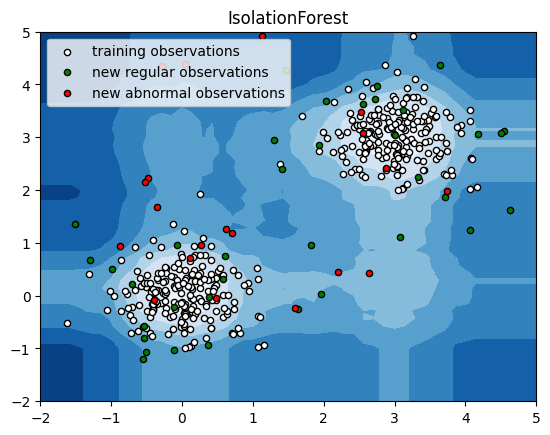

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate synthetic data
rng = np.random.RandomState(42)

# Generate normal data
X_train = 0.5 * rng.randn(200, 2)
X_train = np.r_[X_train + 3, X_train]
X_test = np.r_[rng.randn(20, 2) + 3, rng.randn(20, 2)]
X_outliers = rng.uniform(low=-1, high=5, size=(20, 2))

# Fit the Isolation Forest model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# Plot the results
xx, yy = np.meshgrid(np.linspace(-2, 5, 50), np.linspace(-2, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([b1, b2, c],
           ["training observations", "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()


In [ ]:
y_pred_outliers

array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
        1, -1, -1])

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split your data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
X_train=X_resampled
y_train=y_resampled

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assume df is your DataFrame and you have train/test split as X_train and X_test
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.29250533,  0.12986671, -1.79973755, ...,  1.03738794,
         1.26634852, -0.31876153],
       [ 0.2262191 , -0.60390387,  0.75288617, ..., -0.53279091,
        -0.70067888, -0.31876153],
       [ 0.2262191 , -0.60390387, -0.30068472, ..., -0.01533222,
         0.04300616,  1.52599328],
       ...,
       [-0.29250533,  0.8636373 , -0.95608849, ..., -1.39435783,
        -1.52754699,  0.60361587],
       [-1.3299542 , -0.60390387, -0.53956472, ...,  0.04153199,
        -0.41024855, -0.31876153],
       [ 0.2262191 ,  0.8636373 ,  0.56292767, ..., -0.57823926,
        -0.9921801 , -1.24113893]])

In [ ]:
X_train

,Session,Day,open,high,low,close,Basis,Upper,Lower,Plot,...,MACD,Signal1,RVI,Candlestick,RVI-based MA,SMI,SMI-based EMA,K,D,Currency div candle
0,3,3,1.056910,1.057220,1.056500,1.056600,1.056226,1.056794,1.055657,1.056548,...,-0.000037,-0.000144,41.229743,1,43.323804,46.403999,42.761647,80.910983,86.063388,2
1,4,2,1.098510,1.098600,1.097630,1.097900,1.098682,1.100056,1.097307,1.098090,...,-0.000285,-0.000203,50.629884,1,53.942702,-29.193350,-28.673386,35.617565,31.603346,2
2,4,2,1.081340,1.081470,1.080820,1.080980,1.081532,1.082722,1.080342,1.081156,...,-0.000383,-0.000361,39.890332,1,39.701468,-50.255048,-54.158186,50.544191,52.193359,4
3,2,2,1.107780,1.108420,1.107740,1.108350,1.107581,1.108273,1.106888,1.107817,...,0.000204,0.000166,64.075861,3,51.628727,46.278457,25.902905,70.476255,56.567483,4
4,6,4,1.087760,1.087810,1.087080,1.087140,1.087256,1.090219,1.084293,1.087245,...,-0.000028,-0.000039,49.456183,4,46.409982,39.012974,28.062164,75.114018,68.324430,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21703,1,4,1.074539,1.074761,1.074378,1.074709,1.074011,1.074966,1.073055,1.074527,...,0.000216,0.000137,61.910267,2,59.125475,64.446379,62.523422,79.961076,73.205971,1
21704,1,2,1.067411,1.067646,1.067256,1.067490,1.067494,1.068365,1.066623,1.067490,...,0.000113,0.000139,49.962829,1,50.193140,-29.148226,-29.304756,28.975610,20.198206,2
21705,3,4,1.070659,1.070965,1.070448,1.070858,1.071661,1.072698,1.070624,1.070920,...,-0.000176,-0.000031,46.526366,2,46.492678,-57.173360,-55.240134,10.764785,8.710289,3
21706,1,2,1.077447,1.078003,1.077372,1.077760,1.077235,1.077790,1.076681,1.077391,...,-0.000136,-0.000222,57.245635,2,56.076169,15.686527,10.690598,52.184498,39.644336,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Example for a classification problem

model = RandomForestClassifier(random_state=42)


In [ ]:
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score  # Or another relevant metric

predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 77.56%


In [ ]:
y_train.value_counts()

0    7236
2    7236
1    7236
Name: Signal, dtype: int64

In [ ]:
import xgboost as xgb

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assume you have a DataFrame `df` with features and target variable
# X = df[feature_columns]
# y = df['target']

# For the purpose of example, I will split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = xgb.XGBClassifier(
    objective='multi:softmax',  # for multi-class classification problems
    num_class=3,  # specify the number of classes
    n_estimators=400,  # number of trees
    max_depth=3,  # depth of each tree
    learning_rate=0.5,  # learning rate
    random_state=42  # random seed for reproducibility
)


# Train the classifier
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{confusion_mat}")


Accuracy: 73.38%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1826
           1       0.23      0.26      0.24       173
           2       0.22      0.26      0.24       202

    accuracy                           0.73      2201
   macro avg       0.44      0.45      0.44      2201
weighted avg       0.75      0.73      0.74      2201

Confusion Matrix:
[[1518  138  170]
 [ 118   45   10]
 [ 135   15   52]]


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

# Predicting probabilities
y_prob = model.predict_proba(X_test)

# Calculating metrics
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"ROC-AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")


ROC-AUC: 0.66
F1 Score: 0.74


In [ ]:
print(np.unique(y_test))
print(y_prob.shape[1])


[0 1 2]
3


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


IndexError: ignored